Objective:
The objective of this assignment is to evaluate your understanding of regression techniques in supervised learning by applying them to a real-world dataset.

In [2]:
import warnings 
warnings.simplefilter(action='ignore',category = FutureWarning)

In [4]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

Loading and Preprocessing

In [7]:
# importing dataset
housing = fetch_california_housing()

In [9]:
# Converting into dataframe
df = pd.DataFrame(housing.data,columns=housing.feature_names)

In [11]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [15]:
# Targeting column
df['MedHouseVal'] = housing.target

In [17]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [19]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [21]:
#Checking duplicates
df.duplicated().sum()

0

In [23]:
# Checking null values
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [25]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [27]:
#Removing Columns
df=df.drop(columns=['Latitude','Longitude','Population'])

In [29]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,2.181467,3.422


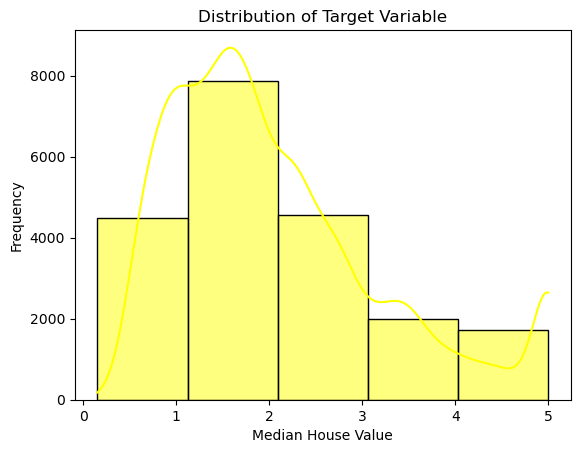

In [31]:
#Visualizing target variable
sns.histplot( df['MedHouseVal'],bins=5,color='yellow',kde=True)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

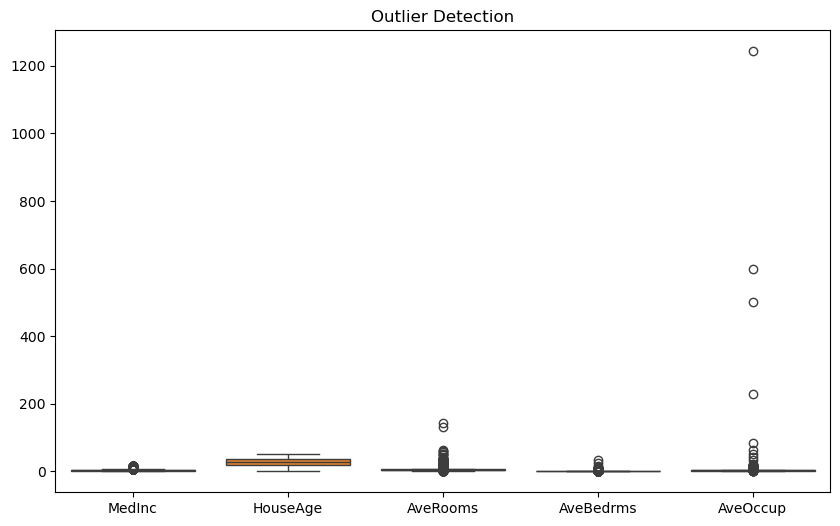

In [33]:
# Checking for Outliers
numerical_columns=['MedInc','HouseAge','AveRooms','AveBedrms','AveOccup']
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.title('Outlier Detection')
plt.show()

In [35]:
# Treating the Ouliers using IQR
outliers_columns = ['MedInc','AveRooms','AveBedrms','AveOccup']

#Calculating the quantiles and iqr for outlier columns
q1= df[outliers_columns].quantile(0.25)
q3=df[outliers_columns].quantile(0.75)
iqr=q3-q1

# Outlier treatment using iqr method(capping at 1.5 times iqr)
lower_outliers = df[outliers_columns] < (q1 - (1.5 *iqr))
upper_outliers = df[outliers_columns] > (q3 + (1.5 *iqr))

In [37]:
# Cap the Outliers to 1.5 times iqr
df[outliers_columns] = df[outliers_columns].clip(lower=(q1 - (1.5 *iqr)),upper=(q3 + (1.5 *iqr)),axis=1)

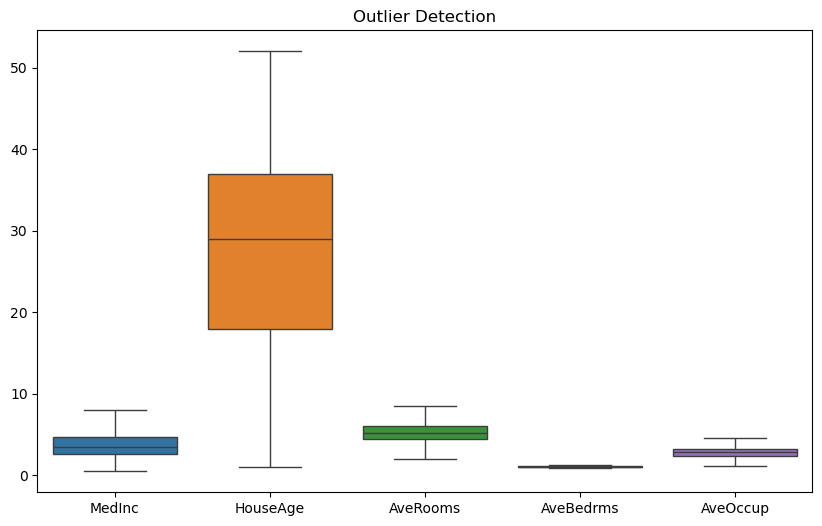

In [39]:
# Confirm Outlier removed
numerical_columns=['MedInc','HouseAge','AveRooms','AveBedrms','AveOccup']
plt.figure(figsize=(10,6))
sns.boxplot(data=df[numerical_columns])
plt.title('Outlier Detection')
plt.show()

In [41]:
df[['MedInc','HouseAge','AveRooms','AveBedrms','AveOccup']].describe()

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.801010,28.639486,5.304740,1.057958,2.899647
std,1.657658,12.585558,1.246177,0.080448,0.691142
min,0.499900,1.000000,2.023219,0.865909,1.150961
25%,2.563400,18.000000,4.440716,1.006079,2.429741
50%,3.534800,29.000000,5.229129,1.048780,2.818116
75%,4.743250,37.000000,6.052381,1.099526,3.282261
max,8.013025,52.000000,8.469878,1.239697,4.561041


In [43]:
df.shape

(20640, 6)

In [45]:
#Checking skewness
df[['MedInc','HouseAge','AveRooms','AveBedrms','AveOccup']].skew()

MedInc       0.735618
HouseAge     0.060331
AveRooms     0.348567
AveBedrms    0.462645
AveOccup     0.510453
dtype: float64

In [47]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,MedHouseVal
0,8.013025,41.0,6.984127,1.023810,2.555556,4.526
1,8.013025,21.0,6.238137,0.971880,2.109842,3.585
2,7.257400,52.0,8.288136,1.073446,2.802260,3.521
3,5.643100,52.0,5.817352,1.073059,2.547945,3.413
4,3.846200,52.0,6.281853,1.081081,2.181467,3.422


In [49]:
# Split features and Target
X = df.drop('MedHouseVal',axis=1)
y = df['MedHouseVal']

In [51]:
# Perform Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [53]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup
14196,3.2596,33.0,5.017657,1.006421,3.691814
8267,3.8125,49.0,4.473545,1.041005,1.738095
17445,4.1563,4.0,5.645833,0.985119,2.723214
14265,1.9425,36.0,4.002817,1.033803,3.994366
2271,3.5542,43.0,6.268421,1.134211,2.300000


In [55]:
X_test.shape

(4128, 5)

In [57]:
y_train.shape


(16512,)

In [59]:
y_test.shape

(4128,)

In [61]:
#Scaling the features
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
X_train_scaled

array([[-3.31679562e-01,  3.48490247e-01, -2.37303323e-01,
        -6.46096260e-01,  1.14874019e+00],
       [ 9.33255665e-04,  1.61811813e+00, -6.73833100e-01,
        -2.17066057e-01, -1.67869728e+00],
       [ 2.07755984e-01, -1.95271028e+00,  2.66670363e-01,
        -9.10345309e-01, -2.53024947e-01],
       ...,
       [-5.27312928e-01,  5.86545474e-01, -1.06440521e+00,
         2.62904285e-01,  6.28113572e-01],
       [ 1.14796321e+00, -1.07984112e+00,  8.67991635e-01,
         1.17542031e-01,  4.06433938e-01],
       [-7.43219494e-01,  1.85617335e+00, -1.53304966e+00,
         3.38497288e-03, -1.14236133e+00]])

Regression Algorithm Implementation

In [66]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_predictions = lr_model.predict(X_test)

In [68]:
mean_squared_error(y_test, lr_predictions)

0.5377956916118353

In [70]:
mean_absolute_error(y_test, lr_predictions)

0.5423038803749092

In [72]:
r2_score(y_test, lr_predictions)

0.5895970643197399

In [74]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

DecisionTreeRegressor(random_state=42)
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [77]:
# Make Predictions
y_pred = tree_model.predict(X_test)

In [79]:
mean_squared_error(y_test, y_pred)

0.8095224781298207

In [81]:
mean_absolute_error(y_test, y_pred)

0.6399064898255814

In [83]:
 r2_score(y_test, y_pred)

0.38223677373110776

In [85]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [87]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

RandomForestRegressor(random_state=42)
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [90]:
#Make Predictions
y_pred = rf_model.predict(X_test)

In [92]:
mean_squared_error(y_test, y_pred)

0.4422058818930854

In [94]:
mean_absolute_error(y_test, y_pred)

0.47387079421027134

In [96]:
r2_score(y_test, y_pred)

0.6625436110131777

In [101]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor

In [103]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

GradientBoostingRegressor(random_state=42)
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [106]:
#Make Predictions
y_pred = gb_model.predict(X_test)

In [108]:
mean_squared_error(y_test, y_pred)

0.43872823794219984

In [110]:
mean_absolute_error(y_test, y_pred)

0.47589375633948683

In [112]:
r2_score(y_test, y_pred)

0.6651974725240732

In [114]:
#Support Vector Regressor
from sklearn.svm import SVR

In [116]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# y needs to be reshaped for scaling
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

In [118]:
svr_model = SVR(kernel='rbf') 
svr_model.fit(X_train_scaled, y_train_scaled)

SVR()

SVR()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [121]:
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

In [123]:
mean_squared_error(y_test, y_pred)

0.4290938075055081

In [125]:
mean_absolute_error(y_test, y_pred)

0.4527085303990925

In [127]:
r2_score(y_test, y_pred)

0.6725497042293422

In [129]:
#Linear Regression

#Linear Regression assumes a straight-line  relationship between the independent variables  and the dependent variable (target). 
#It tries to fit a line that minimizes the sum of squared errors between predicted and actual values.
# It is fast.

In [131]:
# Decision Tree Regressor

#Decision Trees split the data into subsets based on feature values. At each node, the data is split to reduce the prediction error. 
#It's like a flowchart that makes decisions step-by-step.
#Can handle non-linear relationships and feature interactions.

In [133]:
# Random Forest Regressor

#Random Forest is an ensemble of decision trees.
#It builds many trees on random samples of the data and averages their predictions to reduce overfitting and improve accuracy.
#Reduces overfitting compared to a single decision tree.

In [135]:
# Gradient Boosting Regressor

# Gradient Boosting builds trees sequentially.
#Each tree tries to correct the errors made by the previous one using gradient descent. 
#The final prediction is a combination of all tree outputs.
#Slower than Random Forest but more tunable and powerful.

In [137]:
#Support Vector Regressor

#SVR fits the best possible line  within a margin .
#It focuses on data points close to the margin and ignores outliers, aiming to balance error and model complexity.
#Needs feature scaling, which you handled correctly!

In [139]:
# Best-Performing Algorithm: Support Vector Regressor 
# Indicates smallest average squared error.